In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import RobustScaler

In [3]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [4]:
class Load_Preprocess():
    def __init__(self, path='C:/Users/abdelFerdous/Desktop/integrify/ML_projects/ML_individual_projects/Credit_card_fraud/creditcard.csv'):
        self.df = pd.read_csv(path)
        self.check_data()
        
    def check_data(self):
        print("##################### Shape #####################")
        print(self.df.shape)
        print("##################### Types #####################")
        print(self.df.dtypes)
        print("##################### Info #####################")
        print(self.df.info())
        print("##################### Null Val #####################")
        print(self.df.isnull().sum())
       
    def target_proportion(self):
        print("##################### Class count #####################")
        print(self.df.Class.value_counts())
        print('No Frauds', round(self.df['Class'].value_counts()[0]/len(self.df) * 100,2), '% of the dataset')
        print('Frauds', round(self.df['Class'].value_counts()[1]/len(self.df) * 100,2), '% of the dataset')
        
        plt.figure(figsize=(8, 6))
        sns.countplot(x='Class', data=self.df)
        plt.title('Class Distribution')
        plt.show()
        
    def hist_class(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(self.df[self.df['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Class 0')
        sns.histplot(self.df[self.df['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Class 1')
        plt.title('Distribution of Amount for Class 0 and 1')
        plt.legend()

        plt.subplot(1, 2, 2)
        sns.histplot(self.df[self.df['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='Class 0')
        sns.histplot(self.df[self.df['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Class 1')
        plt.title('Distribution of Time for Class 0 and 1')
        plt.legend()

        plt.tight_layout()
        plt.show()
        
    
    def hist_num_features(self):
        num_features = self.df.drop(['Time', 'Amount', 'Class'], axis=1).columns

        plt.figure(figsize=(16, 20))
        for i, feature in enumerate(num_features, 1):
            plt.subplot(7, 4, i)
            sns.histplot(self.df[self.df['Class'] == 0][feature], bins=30, kde=True, color='blue', label='Class 0')
            sns.histplot(self.df[self.df['Class'] == 1][feature], bins=30, kde=True, color='red', label='Class 1')
            plt.title(f'Distribution of {feature} for Class 0 and 1')
            plt.legend()

        plt.tight_layout()
        plt.show()
        
        
    def corr_matrix(self):
        corr_matrix = self.df.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()
        
        
    def  scale_df(self):
        self.df.drop_duplicates(inplace=True)
       
        rob_scaler = RobustScaler()
        self.df['Amount'] = rob_scaler.fit_transform(self.df['Amount'].values.reshape(-1,1))
        self.df['Time'] = rob_scaler.fit_transform(self.df['Time'].values.reshape(-1,1))
        print(self.df.info())
    
    def Rebalance_Target_Data(self, X_train, y_train):
        print('Before over-Sampling:')
        print('Class 0 count:', np.sum(y_train == 0))
        print('Class 1 count:', np.sum(y_train == 1))
        
        ros = RandomOverSampler(random_state=42)
        X_over, y_over = ros.fit_resample(X_train, y_train)

        print('After over-Sampling:')
        print('Class 0 count:', np.sum(y_over == 0))
        print('Class 1 count:', np.sum(y_over == 1))
        
        return X_over, y_over
        
    def Preprocessing(self):
        X = self.df.iloc[:, self.df.columns != 'Class']
        y = self.df.iloc[:, self.df.columns == 'Class']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.2, random_state=42)
        
        X_under, y_under = self.Rebalance_Target_Data(X_train, y_train)
        
        return X_under, X_test, y_under, y_test
        
        
        
        
        
        
        
    
    
    
    
    
    

In [5]:
LP = Load_Preprocess()
LP.df

##################### Shape #####################
(284807, 31)
##################### Types #####################
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##################### Class count #####################
Class
0    284315
1       492
Name: count, dtype: int64
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


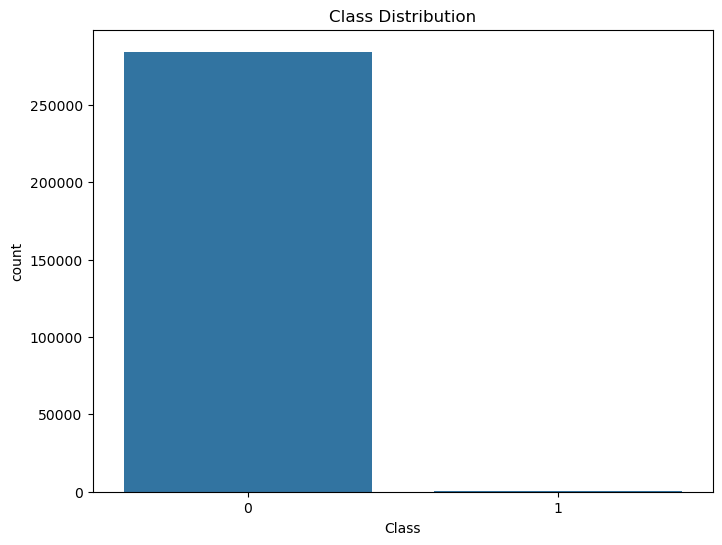

In [6]:
LP.target_proportion()

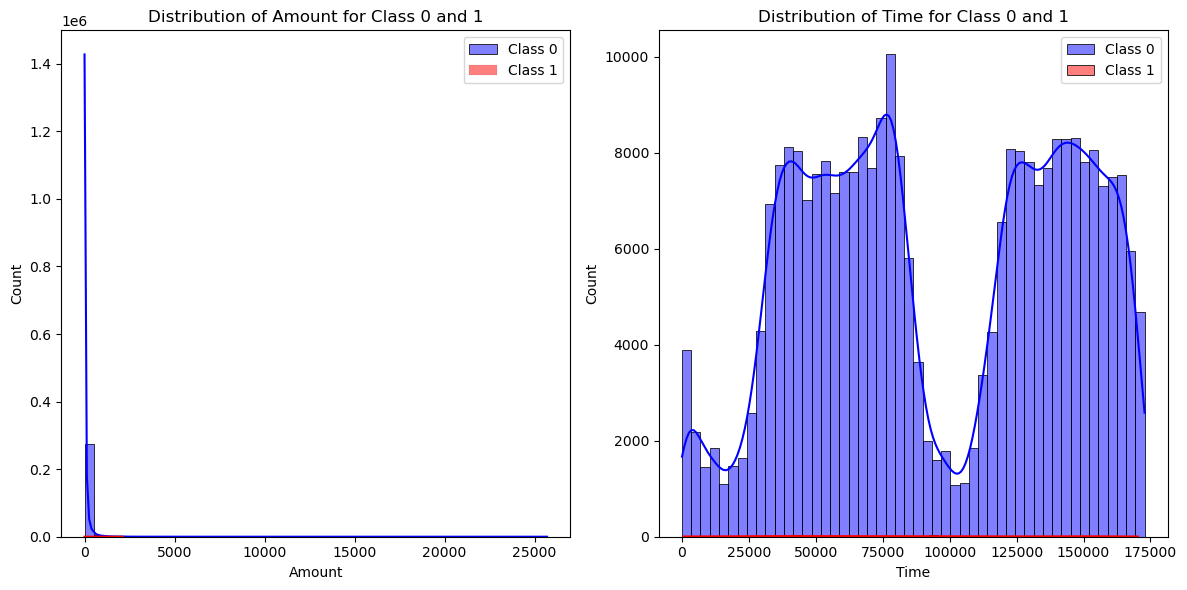

In [7]:
LP.hist_class()

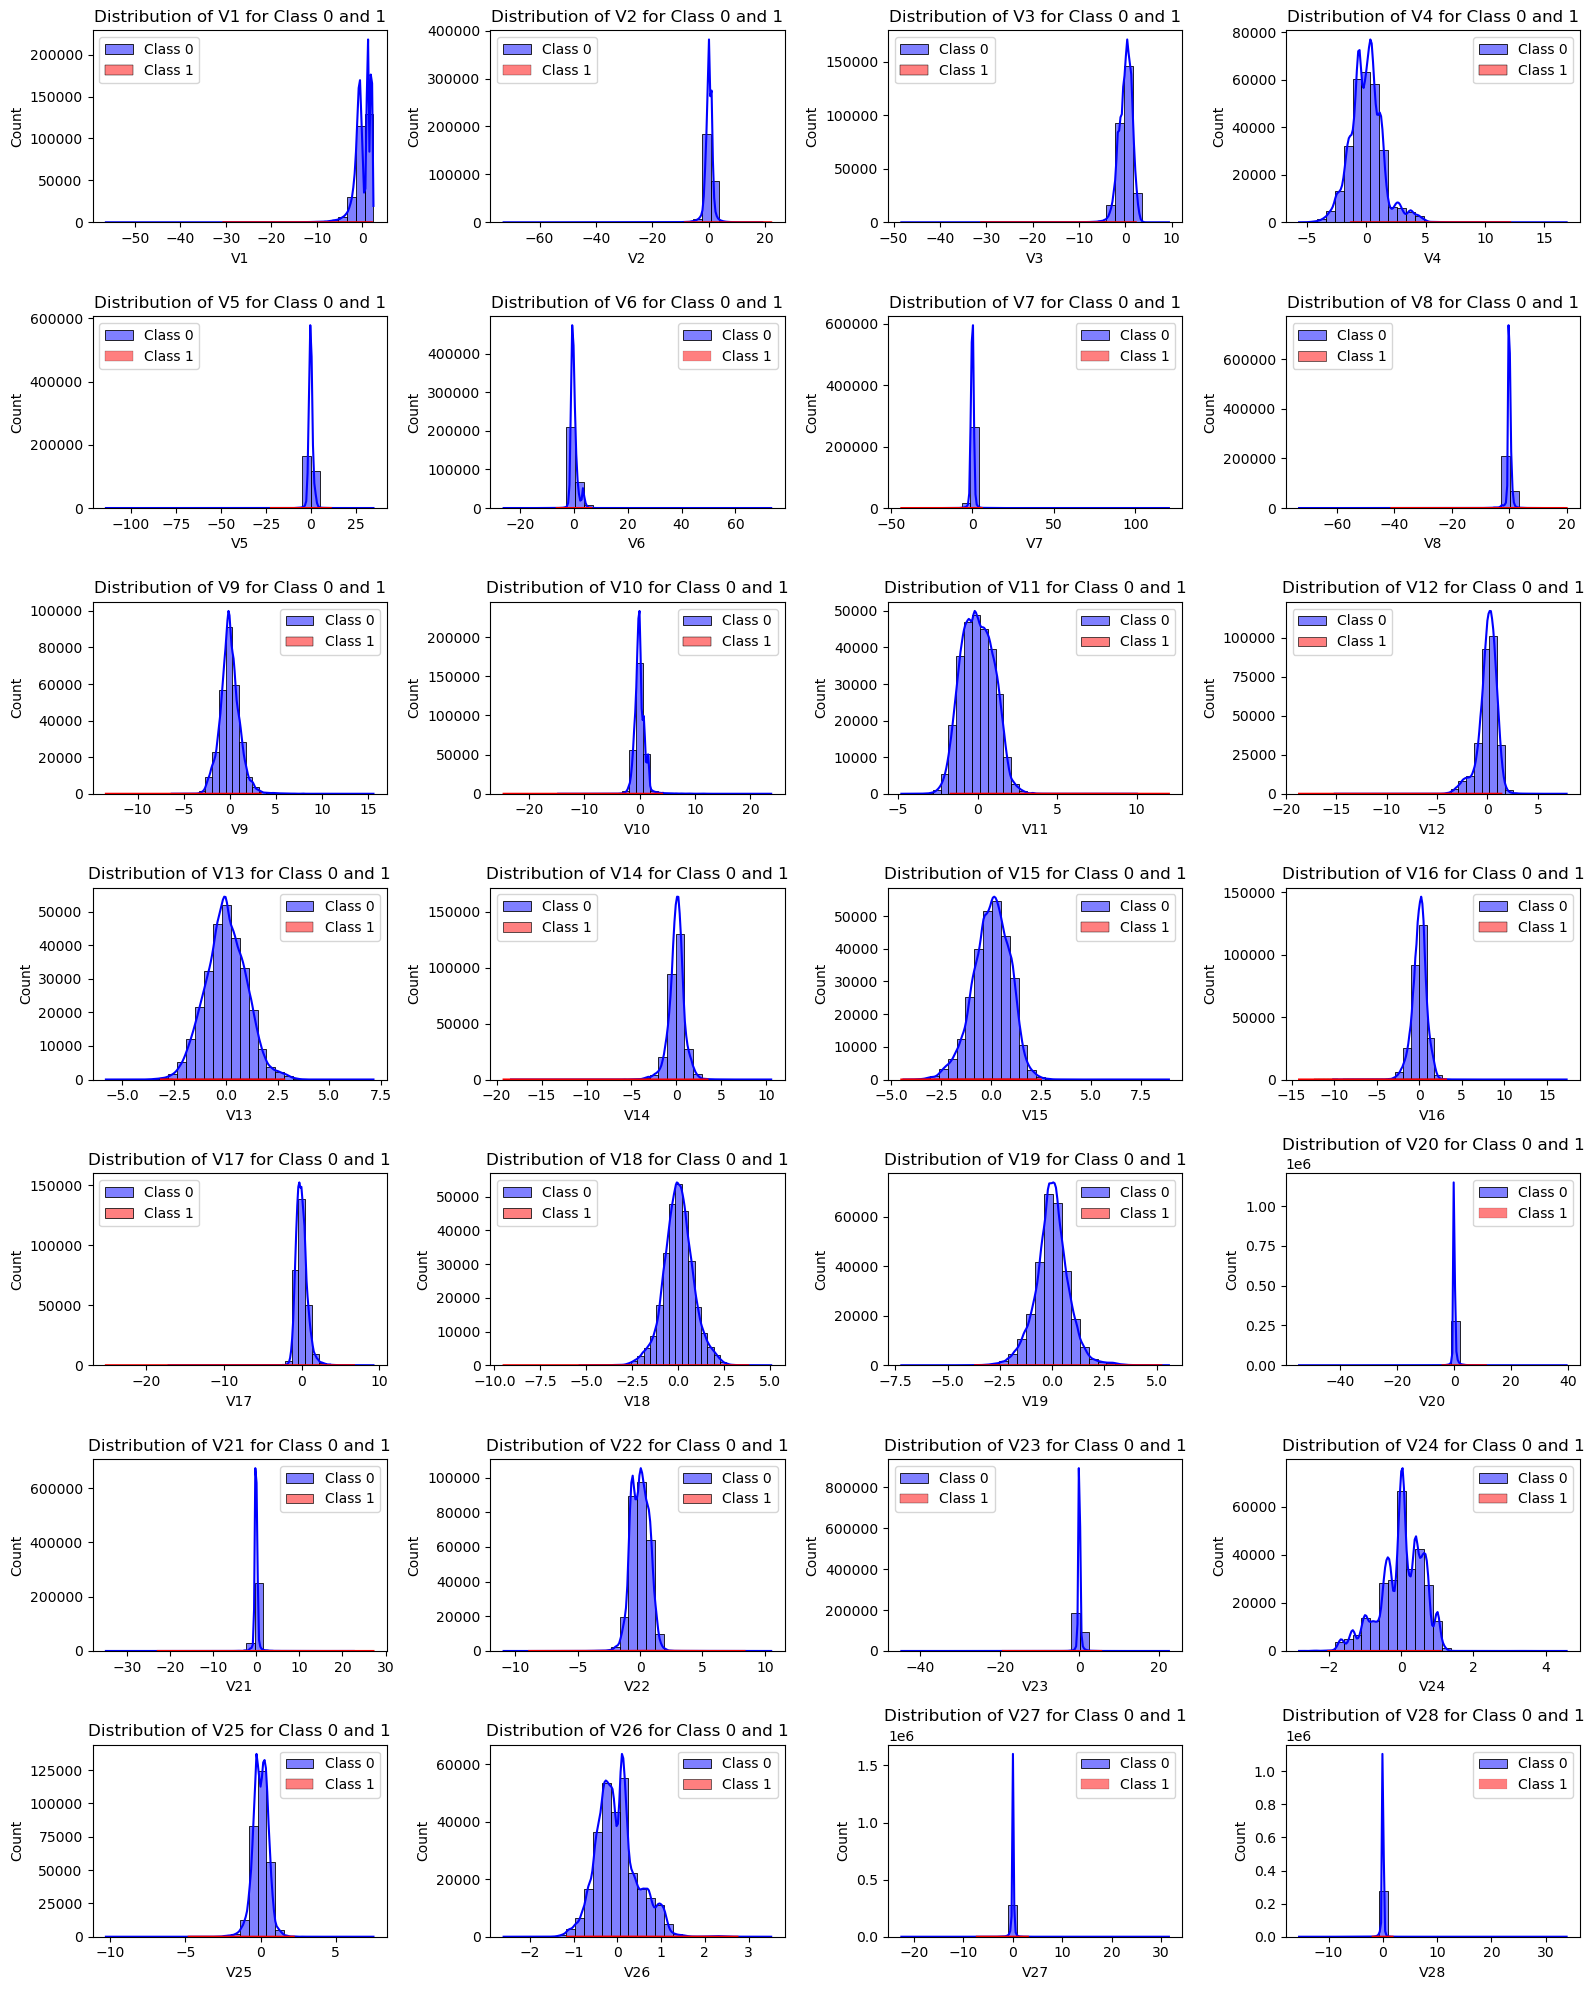

In [8]:
LP.hist_num_features()

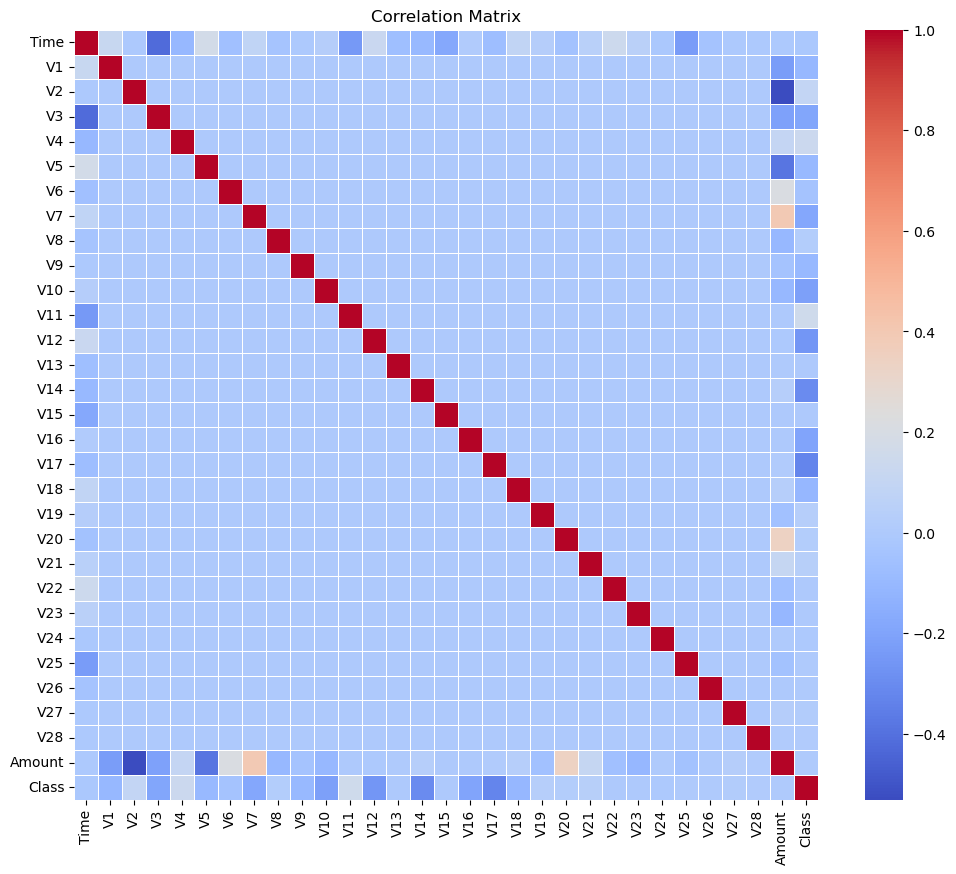

In [35]:
LP.corr_matrix()

In [9]:
LP.scale_df()
LP.df

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.035258,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.295230,0
284803,1.035270,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038798,0
284804,1.035282,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.638020,0
284805,1.035282,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.166875,0


In [31]:
x_train , x_test , y_train, y_test = LP.Preprocessing()

Before over-Sampling:
Class 0 count: 226597
Class 1 count: 383
After over-Sampling:
Class 0 count: 226597
Class 1 count: 226597


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyClassifier

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 97.78


In [19]:
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='f1')

print("Cross-Validation Scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Cross-Validation Scores: [0.94437617 0.94605328 0.94677731 0.94709812 0.94645961]
Mean Accuracy: 0.95


In [26]:
param_grid = {
    'penalty': ['l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5)  

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

best_predictions = best_model.predict(x_test)
best_accuracy = accuracy_score(y_test, best_predictions)
print(f'Best Model Accuracy: {best_accuracy*100:.2f}')

cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='f1')
print("Cross-Validation Scores:", cv_scores)

mean_accuracy = cv_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Best Model Accuracy: 97.80
Cross-Validation Scores: [0.94461265 0.94611787 0.94692801 0.94729186 0.94664243]
Mean Accuracy: 0.95


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
RFC_model = RandomForestClassifier()

RFC_model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the Testing Set: {accuracy:.2f}")

Accuracy on the Testing Set: 0.98


In [22]:
cv_sc = cross_val_score(RFC_model, x_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_sc)
mean_accuracy = cv_sc.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Cross-Validation Scores: [0.99995587 0.99998897 0.99994484 0.99995587 0.9999338 ]
Mean Accuracy: 1.00


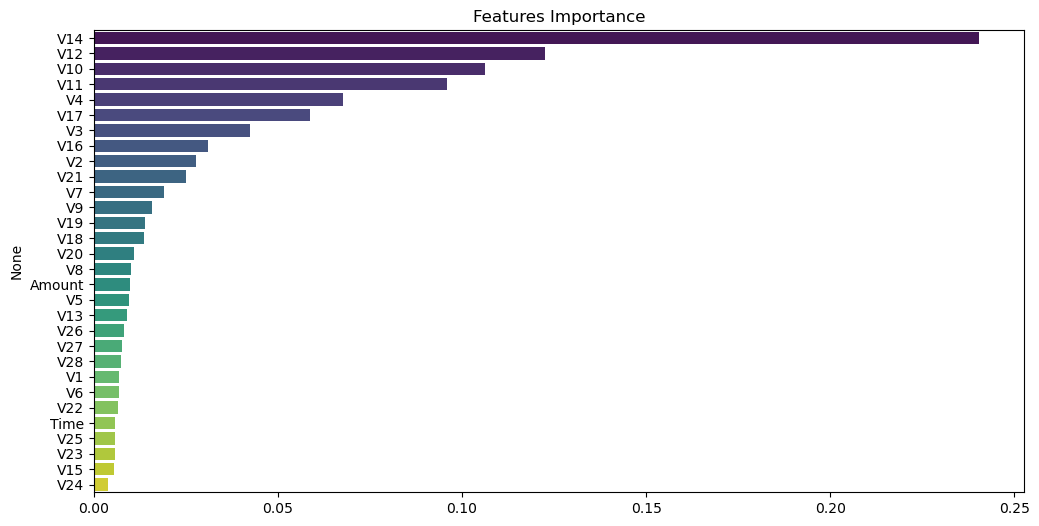

In [21]:
feature_importances = RFC_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_idx], y=x_train.columns[sorted_idx], palette='viridis',hue=x_train.columns[sorted_idx], legend=False)
plt.title('Features Importance')
plt.show()